In [1]:
from preprocess import preprocess_data
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import pickle
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
 # Splitting to Train, Test, Validation and Loading data - was run once and test and validation files were used for all files
data1 = pd.read_csv("data.csv")
train_data, temp_data = train_test_split(data1, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=2/3, random_state=42)
train_data.to_csv("train_data.csv", index=False)
validation_data.to_csv("validation_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)


data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
validation_data = pd.read_csv("validation_data.csv")


In [3]:
data,test_data,validation_data = preprocess_data(data,test_data,validation_data,True)

Starting preprocessing
Converting Julian Time
Adding 4th of July feature
Adding season feature
Handling nulls
Converting dates to hours
Adding hours to containment feature
Adding is_day feature
Adding days_till_cont feature
Create bins for discovered hour
Add holiday feature
KNN classification starting...
Creating dummies for data
FIRE_SIZE_CLASS
Season
discovery_month
classified_as
Creating dummies for test_data
FIRE_SIZE_CLASS
Season
discovery_month
classified_as
Creating dummies for validation_data
FIRE_SIZE_CLASS
Season
discovery_month
classified_as
Removing features for model


#  X & Y Splitting

In [4]:
X_train = data.drop(columns = ['STAT_CAUSE_DESCR'])
y_train = data['STAT_CAUSE_DESCR']
X_test = test_data.drop(columns = ['STAT_CAUSE_DESCR'])
y_test = test_data['STAT_CAUSE_DESCR']

# Feature Selection

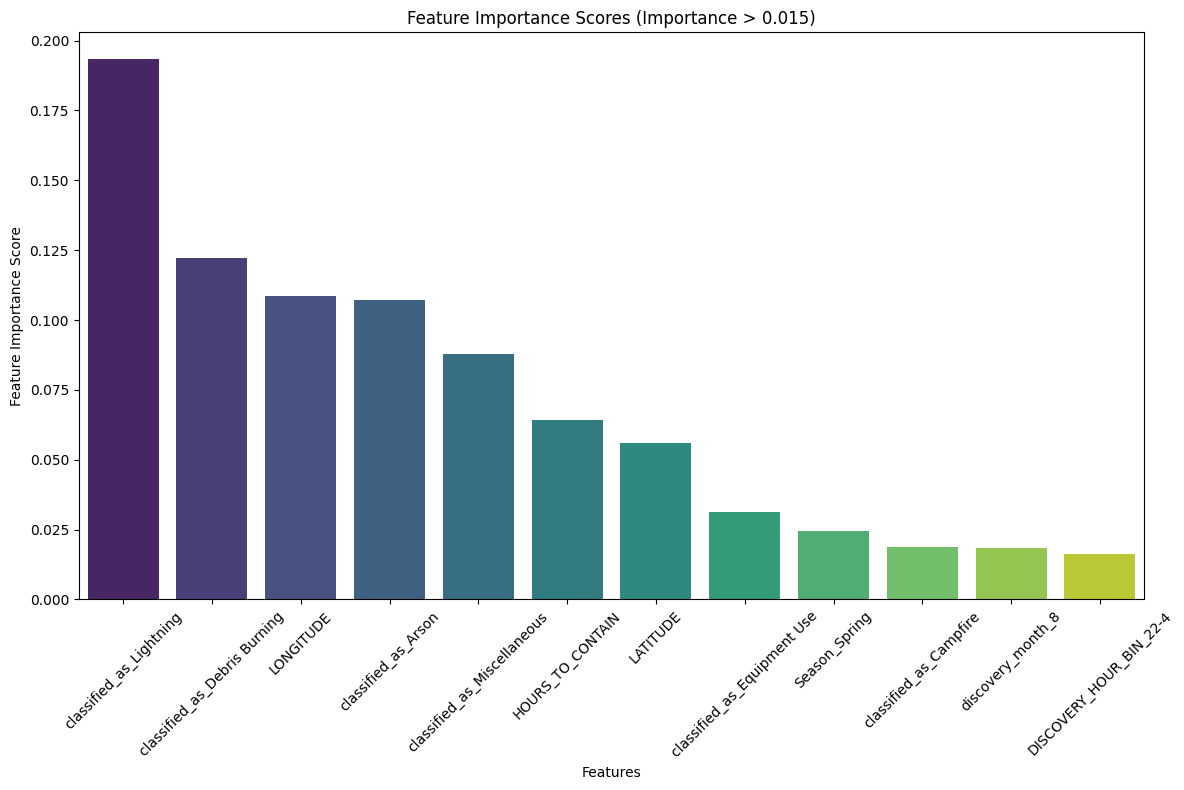

Significant Features:
['classified_as_Lightning', 'classified_as_Debris Burning', 'LONGITUDE', 'classified_as_Arson', 'classified_as_Miscellaneous', 'HOURS_TO_CONTAIN', 'LATITUDE', 'classified_as_Equipment Use', 'Season_Spring', 'classified_as_Campfire', 'discovery_month_8', 'DISCOVERY_HOUR_BIN_22-4']
AUC-ROC Score: 0.8132291647320832


In [5]:
IMPORTANCE = 0.015
# best parameters discovered
min_samples_leaf = 16
min_samples_split = 80
n_estimators = 40

# # Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=n_estimators, 
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf)

# Train the model using the filtered training data
rf_model.fit(X_train, y_train)



# Calculate feature importances
feature_importances = sorted(list(zip(X_train.columns, rf_model.feature_importances_)), key=lambda x: -x[1])
feature_importances_filtered = [(feature, importance) for feature, importance in feature_importances if importance > IMPORTANCE]

# Plot feature importances
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.barplot(x=[x[0] for x in feature_importances_filtered], 
            y=[x[1] for x in feature_importances_filtered], 
            palette='viridis')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title(f'Feature Importance Scores (Importance > {IMPORTANCE})')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# # Filter feature importances with a significance level above 0.0
significant_features = [feature for feature, importance in feature_importances if importance > IMPORTANCE]

# Print the list of significant features
print("Significant Features:")
print(significant_features)


# Predict probabilities for the test data
positive_probs = rf_model.predict_proba(X_test)


# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, positive_probs, multi_class='ovr')
print("AUC-ROC Score:", auc_roc_score)
    


# Feature Importance 
Here we filter the best features and here we get our best and final model - Haleluja!

In [6]:
X_train_filtered = X_train[significant_features]
y_train = data['STAT_CAUSE_DESCR']
X_test_filtered = X_test[significant_features]
y_test = test_data['STAT_CAUSE_DESCR']

In [7]:
# best parameters discovered
min_samples_leaf = 16
min_samples_split = 80
n_estimators = 40

# # Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=n_estimators, 
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf)

# Train the model using the filtered training data
rf_model.fit(X_train_filtered, y_train)

# Predict probabilities for the test data
positive_probs = rf_model.predict_proba(X_test_filtered)


# # Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, positive_probs, multi_class='ovr')
print("AUC-ROC Score:", auc_roc_score)
    
    


AUC-ROC Score: 0.8280726208215071
